In [2]:
import pandas as pd

In [3]:
hr_data1= pd.read_csv(r'C:\Users\HappyPC\Desktop\Datascience\Springboard\Project1_hr_analytics\train_data_hr.csv')

In [4]:
#Take a quick look at data summary for each column
hr_data1.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
#Take a quick look at data types and missing value info
hr_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
#Find Columns having NULL values
hr_data1.isna().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [7]:
#Find Count of rows with NULL values for each column
hr_data1.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
#Create a new column for Education with information of which values were NULL before filling them most frequent value
hr_data1['education_isnull'] = hr_data1['education'].isnull().astype(int)
hr_data1['education_isnull'].value_counts()

0    52399
1     2409
Name: education_isnull, dtype: int64

In [9]:
#Create new column for previous_year_rating with information of which values were NULL before filling them most frequent value
hr_data1['previous_year_rating_isnull'] = hr_data1['previous_year_rating'].isnull().astype(int)
hr_data1['previous_year_rating_isnull'].value_counts()

0    50684
1     4124
Name: previous_year_rating_isnull, dtype: int64

In [10]:
# Find most frequest value for education and staore in variable most_freq_edu
most_freq_edu = hr_data1['education'].value_counts().sort_values(ascending = False).index[0]
most_freq_edu

"Bachelor's"

In [11]:
#Fill NULL values for education column with most_freq_edu
hr_data1['education']= hr_data1['education'].fillna(most_freq_edu)

In [12]:
# Find most frequest value for previous_year_rating and staore in variable most_freq_pry_rtng
most_freq_pry_rtng = hr_data1['previous_year_rating'].value_counts().sort_values(ascending = False).index[0]
most_freq_pry_rtng

3.0

In [13]:
#Fill NULL values for previous_year_rating column with most_freq_pry_rtng
hr_data1['previous_year_rating']= hr_data1['previous_year_rating'].fillna(most_freq_pry_rtng)

In [14]:
hr_data1.round(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_isnull,previous_year_rating_isnull
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0,0,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0,0,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0,0,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0,0,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0,0,0


In [15]:
#hr_data1 = pd.get_dummies(hr_data1, prefix ='DM')

In [16]:
hr_data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_isnull,previous_year_rating_isnull
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0,0


# Data Exploration and Visualization Begins

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

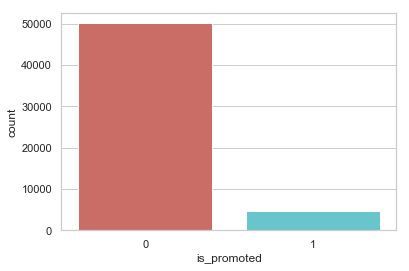

<Figure size 432x288 with 0 Axes>

In [18]:
#Find count of dependent variable is_promoted for each possible outcome i.e. (Binary : 1,0) in dataset
sns.countplot(x ='is_promoted', data = hr_data1, palette = 'hls' )
plt.show()
plt.savefig('count_plot')
#Looking at below graph we have a clear indication of an imbalanced dataset

# Obesrvations for numerical variables

In [19]:
hr_data1.groupby('is_promoted').mean()
# Average age of people promoted is less (Younger) to those who did not.
# Surprisingly More trainings didnt help with promotion as average number of trainings is less for people promoted.
# People who got promoted had better performance ratings last year.
# People who got promoted were also on average were more recent joiners to company then people who did not.
# People who got promoted had better average training score.
# People who got promoted also got more awards.
# More % of people who met the KPIs got promoted
# People with better performance ratings last year had better chance for promotion.

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_isnull,previous_year_rating_isnull
is_promoted,,,,,,,,,,
0,39187.520423,1.257639,34.844037,3.247686,5.879398,0.319685,0.014180,62.647686,0.045612,0.075489
1,39285.092331,1.203299,34.372965,3.914524,5.716367,0.698800,0.119751,71.325193,0.026135,0.072622


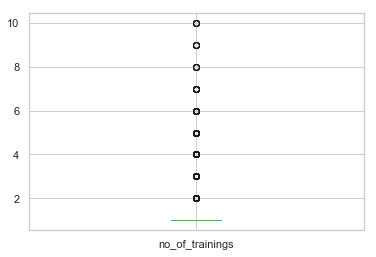

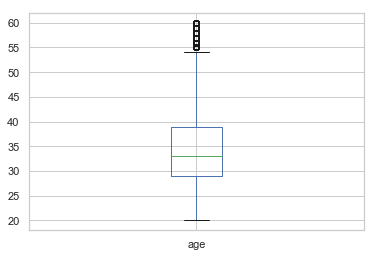

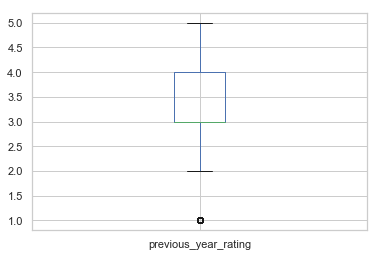

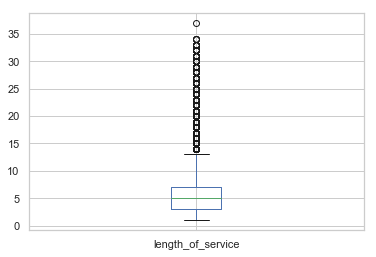

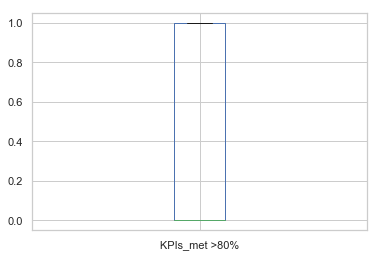

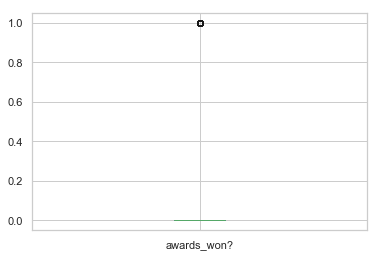

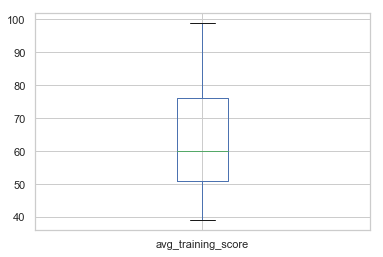

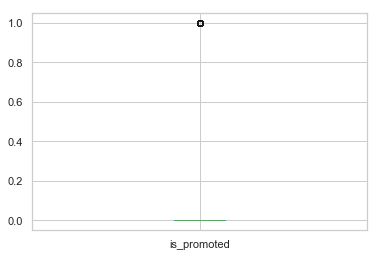

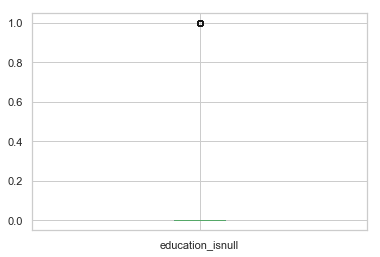

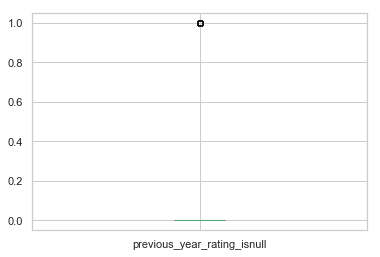

In [36]:
#Observing Outliers
for column in hr_data1:
    if column != 'employee_id' and hr_data1[column].dtype != 'object':
        
        plt.figure()
        hr_data1.boxplot(column)
     
# For number of trainings, its possible some people took more trainings.
# (Maybe people with large value for lenghth of service have more trainings - I will check this hypothesis next)
# For age its very much possible to have employees between 55 - 60 ( As most of companies have retirement age 65)
# Same is true for length of service - very much possible some employees have been for very long

In [21]:
#Check if people with higher lenth of service has more traings 
hr_data1.groupby('no_of_trainings').mean()[['length_of_service']]
#My Hypothesis was not right. It doesnt seem number of trainings is more for people with higher length of service
#

,length_of_service
no_of_trainings,
1,5.986592
2,5.430700
3,5.145270
4,4.912393
5,4.773438
6,5.750000
7,5.333333
8,2.600000
9,2.200000


# Visualizations from Categorical variables

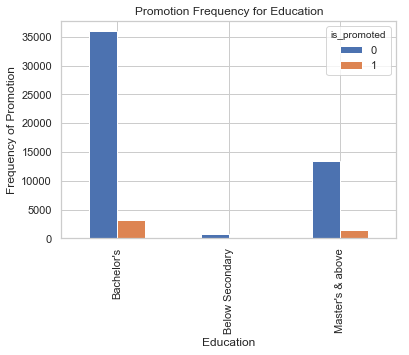

In [22]:
#Visualize how education impacts promotion
pd.crosstab(hr_data1.education,hr_data1.is_promoted).plot(kind='bar')
plt.title('Promotion Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Promotion')
plt.savefig('Promotion_per_Edu')
#Company does seem to hire more of bachelors
#The frequency of promotion does seems to depend a great deal on the Education. 
# I will now look at ratio or promotion to each education to confirm

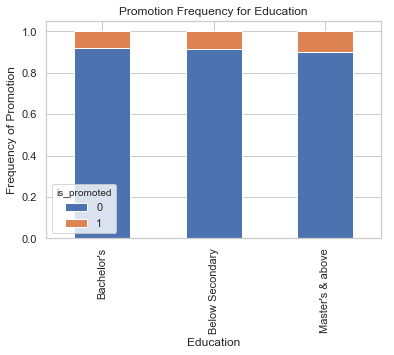

In [23]:
#Visualize how education impacts promotion
table = pd.crosstab(hr_data1.education,hr_data1.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Promotion Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Promotion')
plt.savefig('Promotion_per_Edu')
#The frequency of promotion does not depend a great deal on the Education. 
#Thus Education can not be a good predictor of the outcome variable.

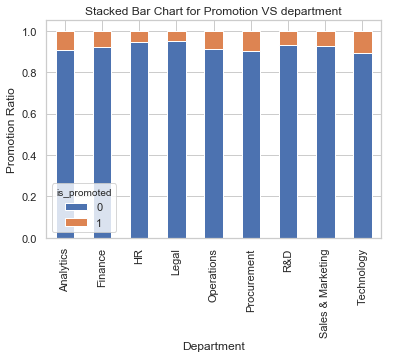

In [24]:
#Visualize how education impacts promotion #department,region,education,gender,recruitment_channel
table = pd.crosstab(hr_data1.department,hr_data1.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Promotion VS department')
plt.xlabel('Department')
plt.ylabel('Promotion Ratio')
plt.savefig('Promotion_per_Dept')

#The promotion depends a great deal on the Department. 
#Thus Department can be a good predictor of the outcome variable.

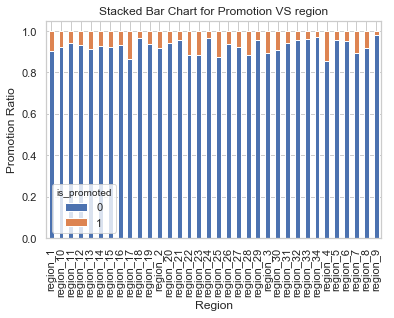

In [25]:
#Visualize how education impacts promotion #department,region,education,gender,recruitment_channel
table = pd.crosstab(hr_data1.region,hr_data1.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Promotion VS region')
plt.xlabel('Region')
plt.ylabel('Promotion Ratio')
plt.savefig('Promotion_per_Regn')

#The promotion depends a great deal on the Region. 
#Thus Region can be a good predictor of the outcome variable.

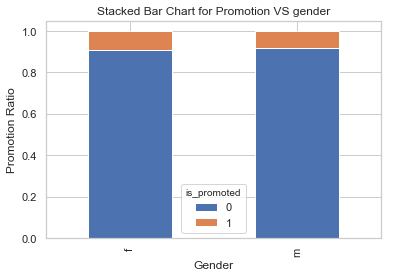

In [26]:
#Visualize how education impacts promotion #department,region,education,gender,recruitment_channel
table = pd.crosstab(hr_data1.gender,hr_data1.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Promotion VS gender')
plt.xlabel('Gender')
plt.ylabel('Promotion Ratio')
plt.savefig('Promotion_per_Gender')

#The promotion doesnt not depend a great deal on the Gender. 
#Thus Gender can't be a good predictor of the outcome variable.